In [8]:
from __future__ import annotations

import geopandas as gpd

from slope_area.builder import (
    BuilderConfig,
    OutletPlotBuilder,
    ResolutionPlotBuilder,
    Trial,
    TrialConfig,
)
from slope_area.plot import SlopeAreaPlotConfig, slope_area_plot
from slope_area.paths import PROJ_ROOT
from slope_area.features import Outlets
from slope_area.geomorphometry import HydrologicAnalysisConfig
from slope_area.logger import create_logger

from slope_area._internal.dem import DEMTilesBuilder, GeneralizedDEM, VRT, DEMTiles, DEMSource, DynamicVRT

logger = create_logger(__name__)

# Paths

In [9]:
dem_dir = PROJ_ROOT / 'data' / 'raw' / 'DEM'
dem_tiles = PROJ_ROOT / 'data' / 'raw' / 'dem_tiles.fgb'
generalized_dem_path = PROJ_ROOT / 'data' / 'raw' / 'dem_30m.tif'
generalized_dem_out = (
    PROJ_ROOT / 'data' / 'processed' / generalized_dem_path.stem
)
outlets = PROJ_ROOT / 'data' / 'raw' / 'outlets.shp'
out_dir = PROJ_ROOT / 'data' / 'processed'

# Run configs

In [10]:
dem_dir_epsg = 3844

tiles = DEMTilesBuilder(
    dem_dir, dem_dir_epsg=dem_dir_epsg, tiles=dem_tiles
).build()
generalized_dem = GeneralizedDEM(
    path=generalized_dem_path, out_dir=generalized_dem_out
)
dem_source = DEMSource(dem_dir, tiles, generalized_dem)
hydrologic_analysis_config = HydrologicAnalysisConfig(
    streams_flow_accumulation_threshold=1000, outlet_snap_distance=100
)
plot_config = SlopeAreaPlotConfig(
    hue='slope_type',
    col='trial',
    log_interval=0.25,
    min_gradient=0.01,
    col_wrap=-1,
    height=5,
    aspect=1,
    add_vlines=False,
    show=True
)

11:34:19 INFO slopeArea.slope_area._internal.dem.DEMTilesBuilder                build(): Found DEM tiles at /media/alex/alex/python-modules-packages-utils/slope-area/data/raw/dem_tiles.fgb


# Read outlets

In [11]:
logger.info('Reading outlets at %s' % outlets)
gdf = gpd.read_file(outlets).sort_values(by='name')
gdf = gdf[gdf['is_gully'] == 1]
outlets = Outlets.from_gdf(gdf, name_field='name')

11:34:19 INFO slopeArea.__main__             <module>(): Reading outlets at /media/alex/alex/python-modules-packages-utils/slope-area/data/raw/outlets.shp


/media/alex/alex/python-modules-packages-utils/slope-area/.venv/lib/python3.12/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D Point' is converted to 'Point Z'
  return ogr_read(


# Plot comparing different DEM resolutions

11:34:19 INFO slopeArea.slope_area._internal.dem.DEMTiles          from_outlet(): Infering DEM tiles based on the outlet
11:34:22 INFO slopeArea.slope_area._internal.dem.DEMTiles       write_whitebox(): Saving Vector object to /media/alex/alex/python-modules-packages-utils/slope-area/data/processed/gully 2/watershed.shp
11:34:22 INFO slopeArea.slope_area._internal.dem.DEMTiles         from_polygon(): Extracted 6 tiles based on the polygon <POLYGON ((650962 642080, 651052 642080, 651052 642050, 651172 642050, 65117...>
11:34:22 INFO slopeArea.slope_area._internal.dem              wrapper(): DEMTiles.from_outlet executed in 3.077056 seconds
11:34:22 INFO slopeArea.slope_area._internal.dem       from_dem_tiles(): Building VRT from 6 rasters


Output()

**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************
**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************
**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************
**********************************************************************************
            DEM needs to be processed to remove topog

11:34:33 INFO slopeArea.slope_area.plot      slope_area_grid(): Creating slope area plot with config SlopeAreaPlotConfig(hue='slope_type', col='trial', log_interval=0.25, min_gradient=0.01, col_wrap=-1, height=5, aspect=1, title=None, xlabel='Drainage area (m$^2$)', ylabel='Slope (m/m)', label_font_size=16, title_font_size=10, legend_font_size=10, tick_font_size=14, add_vlines=False, kind='line', show=True)
11:34:33 INFO slopeArea.slope_area.plot         get_col_wrap(): Infered 5 cols for the plot
11:34:36 INFO slopeArea.slope_area.plot      slope_area_grid(): Saved slope area plot at /media/alex/alex/python-modules-packages-utils/slope-area/data/processed/gully 2/slope_area.png


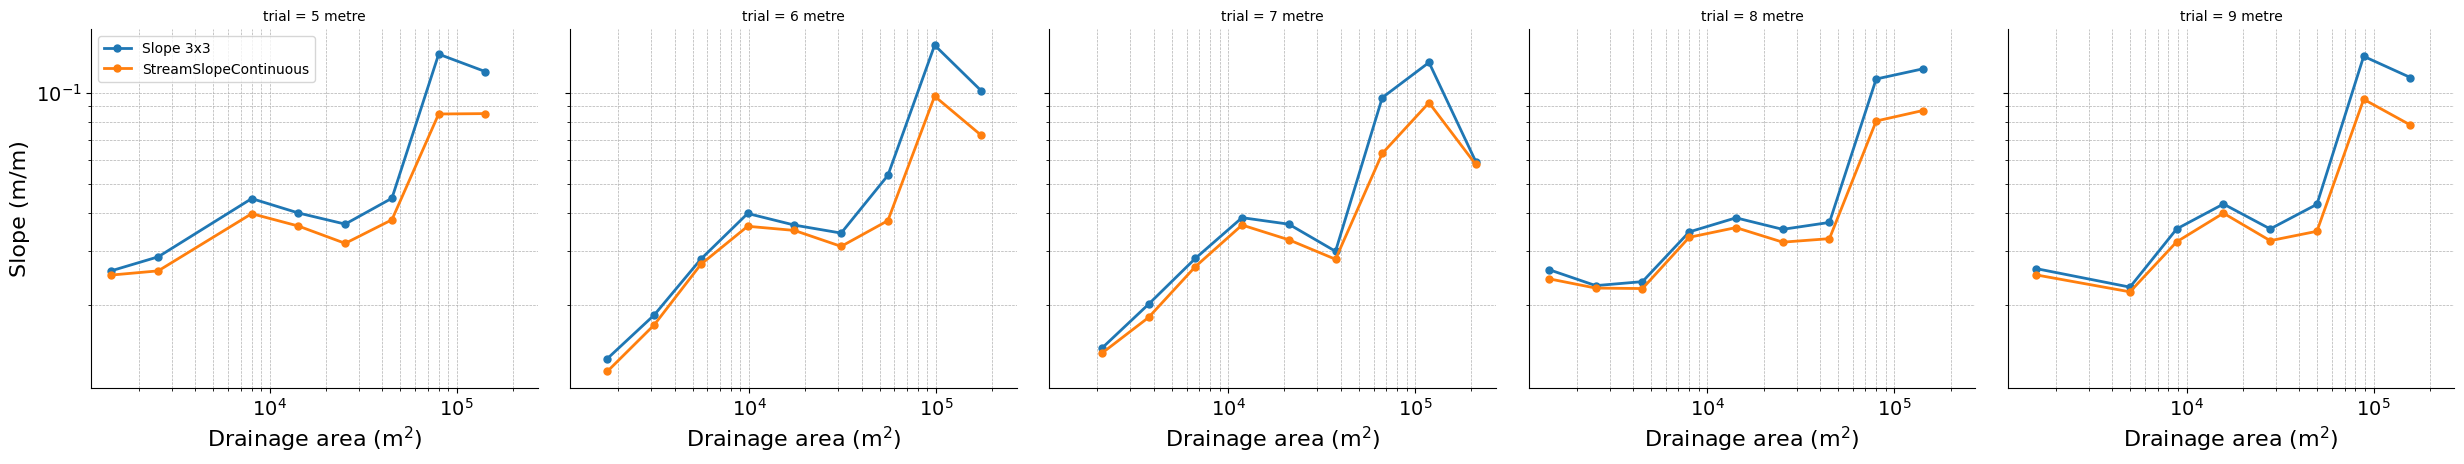

In [12]:
outlet_name = 'gully 2'
resolutions = [(res, res) for res in range(5, 10)]
max_workers = 5

builder_config = BuilderConfig(
    hydrologic_analysis_config,
    out_dir / outlet_name,
    plot_config=plot_config,
    max_workers=max_workers
)

outlet = [outlet for outlet in outlets if outlet.name == outlet_name][0]

dem = builder_config.out_dir / 'dem.vrt'
dem_tiles = DEMTiles.from_outlet(
    dem_source=dem_source,
    outlet=outlet,
    out_dir=builder_config.out_dir,
    outlet_snap_dist=builder_config.hydrologic_analysis_config.outlet_snap_distance,
)
vrt = VRT.from_dem_tiles(dem_tiles, dem)

ResolutionPlotBuilder(
    builder_config, vrt, outlet, resolutions
).build()

Output()

**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


11:36:31 INFO slopeArea.slope_area.plot      slope_area_grid(): Creating slope area plot with config SlopeAreaPlotConfig(hue='slope_type', col='trial', log_interval=0.25, min_gradient=0.01, col_wrap=-1, height=5, aspect=1, title=None, xlabel='Drainage area (m$^2$)', ylabel='Slope (m/m)', label_font_size=16, title_font_size=10, legend_font_size=10, tick_font_size=14, add_vlines=False, kind='line', show=True)
11:36:31 INFO slopeArea.slope_area.plot         get_col_wrap(): Infered 4 cols for the plot
11:36:48 INFO slopeArea.slope_area.plot      slope_area_grid(): Saved slope area plot at /media/alex/alex/python-modules-packages-utils/slope-area/data/processed/outlet/slope_area.png


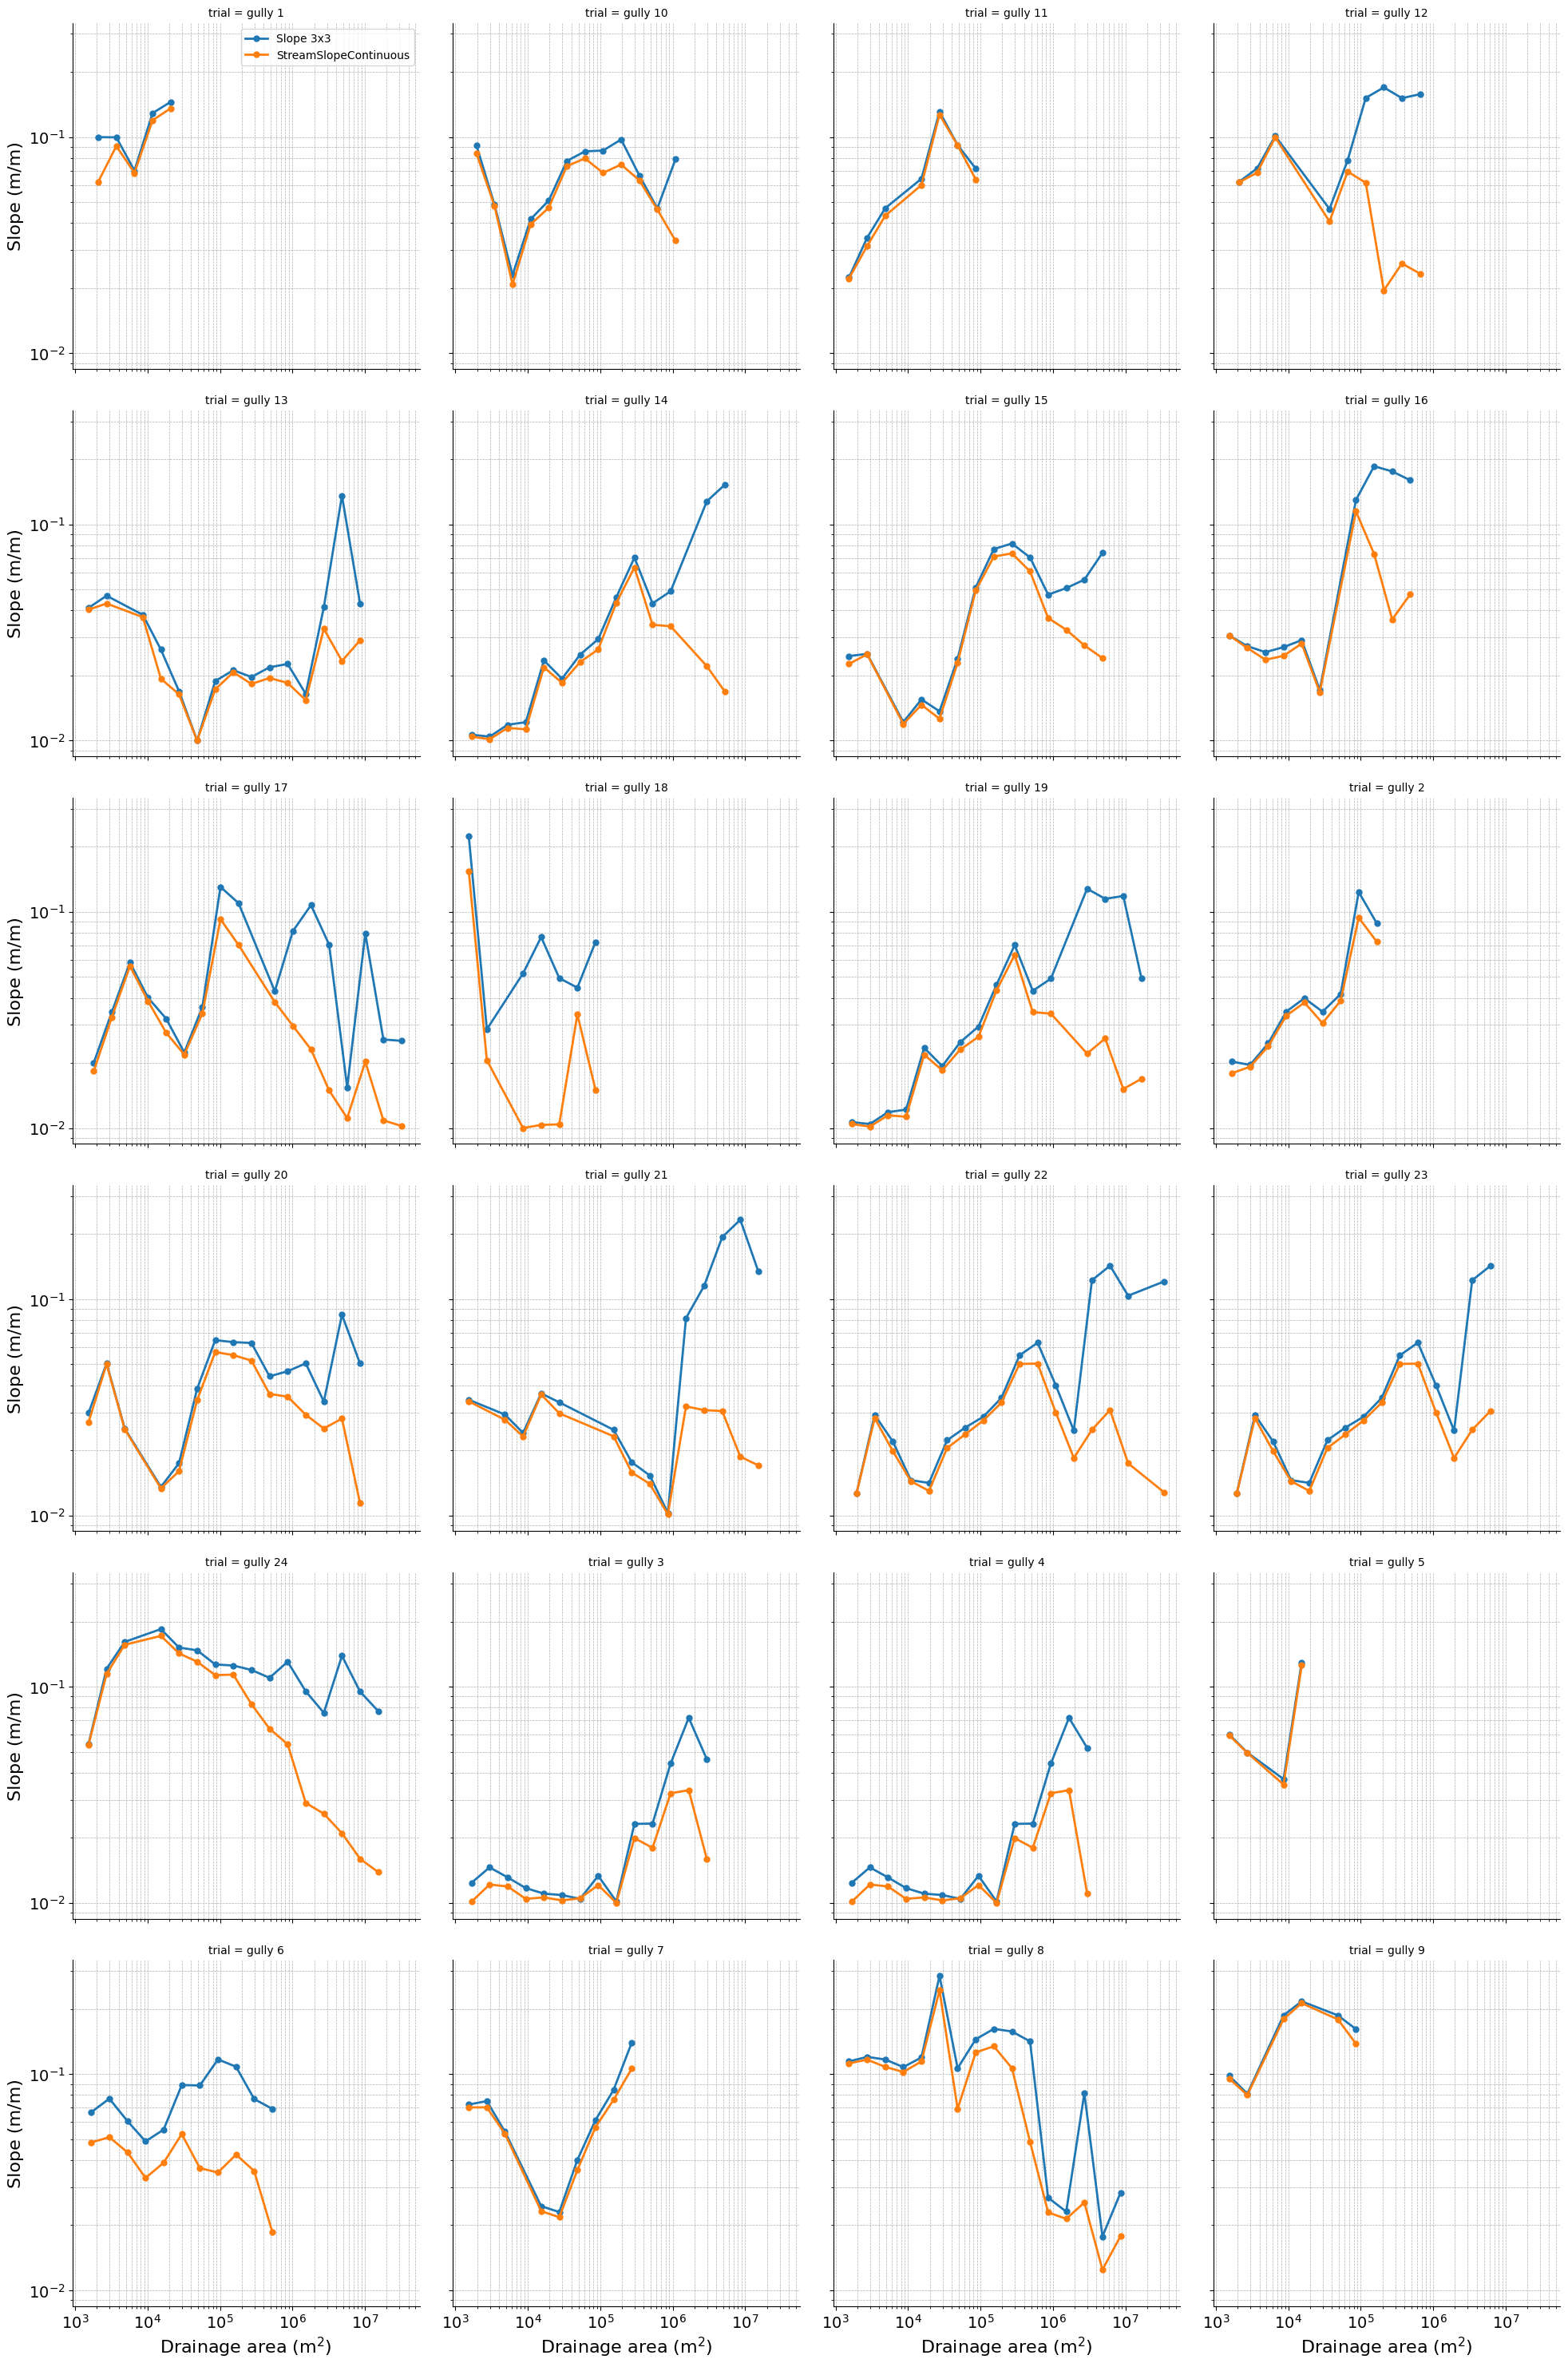

In [13]:
resolution = (10, 10)
max_workers = 2

builder_config = BuilderConfig(
    hydrologic_analysis_config,
    out_dir / 'outlet',
    plot_config=plot_config,
    max_workers=max_workers
)

dem_provider = DynamicVRT(dem_source, out_dir / 'outlet', outlet_snap_distance=100)

OutletPlotBuilder(
    builder_config, dem=dem_provider, outlets=outlets, resolution=resolution
).build()

In [ ]:
outlet = outlets[1]
out_dir = out_dir / (outlet.name or 'outlet')

dem = out_dir / 'dem.vrt'
dem_tiles = DEMTiles.from_outlet(
    dem_source=dem_source,
    outlet=outlet,
    out_dir=out_dir,
    outlet_snap_dist=hydrologic_analysis_config.outlet_snap_distance,
)
vrt = VRT.from_dem_tiles(dem_tiles, dem)

trial = Trial(
    TrialConfig(
        name=outlet.name or 'outlet',
        outlet=outlet,
        resolution=(2, 2),
        hydrologic_analysis_config=hydrologic_analysis_config,
        dem=vrt,
        out_dir=out_dir,
    )
).run()

print(trial.profiles.head())

plot_config = SlopeAreaPlotConfig(hue='slope_type', kind='line')
ax = slope_area_plot(trial.profiles, config=plot_config, out_fig=trial.config.out_dir / 'slope_area.png')

plot_config = SlopeAreaPlotConfig(hue='slope_type', kind='scatter')
ax = slope_area_plot(trial.profiles, config=plot_config, out_fig=trial.config.out_dir / 'slope_area.png')

11:36:54 INFO slopeArea.slope_area._internal.dem.DEMTiles          from_outlet(): Infering DEM tiles based on the outlet
11:36:57 INFO slopeArea.slope_area._internal.dem.DEMTiles       write_whitebox(): Saving Vector object to /media/alex/alex/python-modules-packages-utils/slope-area/data/processed/gully 10/watershed.shp
11:36:58 INFO slopeArea.slope_area._internal.dem.DEMTiles         from_polygon(): Extracted 12 tiles based on the polygon <POLYGON ((733282 537950, 733312 537950, 733312 537920, 733342 537920, 73334...>
11:36:58 INFO slopeArea.slope_area._internal.dem              wrapper(): DEMTiles.from_outlet executed in 3.224651 seconds
11:36:58 INFO slopeArea.slope_area._internal.dem       from_dem_tiles(): Building VRT from 12 rasters
11:36:58 INFO slopeArea.slope_area.builder.Trial                  run(): Running...


11:36:58 WARNING slopeArea.slope_area.builder.Trial    get_resampled_dem(): CRS of dem.vrt is unprojected. Defaulting to the outlet CRS EPSG:3844


11:36:58 INFO slopeArea.slope_area.builder.Trial             resample(): Resampling Raster dem.vrt at resolution=(2, 2)
11:36:58 INFO slopeArea.slope_area.builder.Trial          get_wbw_env(): Initialized Whitebox Environment
11:36:58 INFO slopeArea.slope_area.builder.Trial       preprocess_dem(): Breaching depressions in the DEM
11:36:58 INFO slopeArea.slope_area.builder.Trial             read_dem(): Reading DEM dem_resampled.tif
11:36:58 DEBUG slopeArea.slope_area.geomorphometry              wrapper(): HydrologicAnalysis.read_dem executed in 0.012519 seconds
11:36:58 INFO slopeArea.slope_area.builder.Trial       preprocess_dem(): Breaching single-cell pits
11:36:58 DEBUG slopeArea.slope_area.geomorphometry              wrapper(): HydrologicAnalysis.preprocess_dem executed in 0.048710 seconds
11:36:58 INFO slopeArea.slope_area.builder.Trial         compute_flow(): Computing the D8 pointer
11:36:58 INFO slopeArea.slope_area.builder.Trial         compute_flow(): Computing the flow accum